<a href="https://colab.research.google.com/github/Goutham-Gourabathuni/infosys-internship-Audio-Analysis/blob/main/Topic_Shift_Detection_Semantic_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Topic Shifts using Semantic Similarity

This notebook demonstrates how topic shifts can be detected in text using sentence embeddings and cosine similarity.

## Concepts Covered
- Topic Shifts
- Semantic Similarity
- Sentence Embeddings (SBERT)
- Cosine Similarity
- Threshold-based Topic Segmentation
- Evaluation Metrics (P_k, WindowDiff)

In [ ]:
!pip install -q sentence-transformers numpy scipy matplotlib

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

## Load Sentence Embedding Model

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

## Sample Transcript

In [ ]:
sentences = [
    'Today we discuss machine learning and its applications.',
    'Machine learning has grown with deep neural networks.',
    'Deep learning models require large datasets.',
    #'Deep learning models can also be used with small datasets',
    'Now let us move to startup funding and investments.',
    'Venture capital trends have shifted in recent years.',
    'Early stage startups are attracting more seed funding.'
]

## 1) Generate Sentence Embeddings

In [ ]:
embeddings = model.encode(sentences)

## 2) Compute Cosine Similarity between Consecutive Sentences

In [ ]:
similarities = []
for i in range(len(embeddings)-1):
    sim = 1 - cosine(embeddings[i], embeddings[i+1])
    similarities.append(sim)

similarities

[np.float32(0.5611887),
 np.float32(0.61290336),
 np.float32(0.12726116),
 np.float32(0.43477386),
 np.float32(0.46581662)]

## Visualize Similarity Scores - The MORE Cosine Similarity, the MORE close the sentences are.

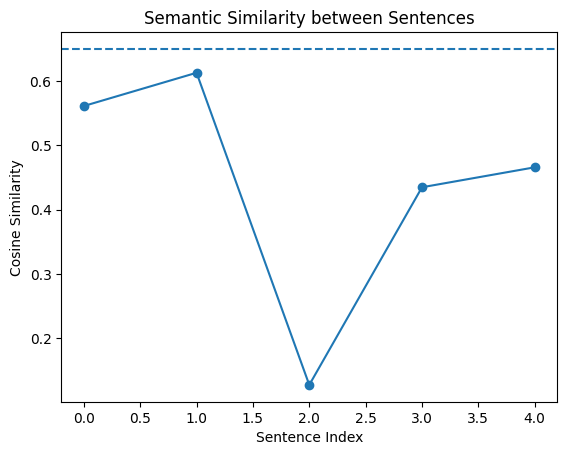

In [ ]:
plt.figure()
plt.plot(similarities, marker='o')
plt.axhline(y=0.65, linestyle='--')
plt.xlabel('Sentence Index')
plt.ylabel('Cosine Similarity')
plt.title('Semantic Similarity between Sentences')
plt.show()

## 3) Detect Topic Shifts using Threshold

In [ ]:
threshold = 0.65
topic_shifts = [i+1 for i, sim in enumerate(similarities) if sim < threshold]
topic_shifts

[1, 2, 3, 4, 5]

## Simple Topic Segmentation Output

In [ ]:
segments = []
start = 0
for idx in topic_shifts:
    segments.append(sentences[start:idx])
    start = idx
segments.append(sentences[start:])

segments

[['Today we discuss machine learning and its applications.'],
 ['Machine learning has grown with deep neural networks.'],
 ['Deep learning models require large datasets.'],
 ['Now let us move to startup funding and investments.'],
 ['Venture capital trends have shifted in recent years.'],
 ['Early stage startups are attracting more seed funding.']]

## Evaluation Metrics (Conceptual)
### P_k and WindowDiff
- **P_k** measures probability that two units at distance k are incorrectly segmented.
- **WindowDiff** penalizes over- and under-segmentation.

These require gold-standard topic boundaries and are used in research for topic segmentation evaluation.

## Research References
- Hearst, M. (1997). TextTiling: Segmenting Text into Multi-paragraph Subtopic Passages.
- Reimers & Gurevych (2019). Sentence-BERT.
- Ambwani & Davis (2010). Using Semantic Similarity Graphs for Topic Segmentation.
- Koshorek et al. (2018). Text Segmentation as a Supervised Learning Task.